In [113]:
def hypothesis(theta,X):  #theta = 1xD, X = DxN, output 1xN
    return np.dot(theta,X)

def gradientDescent(X,y,learning_rate,num_epoch,verbose=False):
    N = X.shape[0]      # number of sample
    D = X.shape[1]      # number of dimensions
    theta = np.ones(D)  # init thetas to some values
    X_trans = X.transpose() # X_trans is DxN
    
    for i in range(0,num_epoch):
        h = hypothesis(theta,X_trans)  #N dimension
        loss = h-y #N dimension
        gradient = X_trans.dot(loss) * (1.0/N)
        theta = theta - learning_rate * (1.0/N) * gradient
    return theta

a)Nous ne sommes pas très confiant sur le \*(1.0/N) dans le calcul du gradient parce qu'a la fin on retrouve avec \*1.0/N^2 ce qui ne correrspond pas à la formule du Batch gradient descent alogrithme. Si on enleve le \*(1.0)/N Il y a des ***RuntimeWarning: invalid value encountered in subtract***

Batch gradient descent algorithm

In [134]:
#Bütikofer Kevin, Charles-Lewis Jaggi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

xl_file = pd.ExcelFile("lausanne-appart.xlsx")

data =  np.array(xl_file.parse("Lausanne-appart")) # sheet name

x = data[:,0:2]
n = x.shape[0]
x_bias = np.ones((n,1))
x_matrice = np.reshape(x,(n,2))
X = np.append(x_bias,x_matrice,axis=1)
y = data[:,2]

In [144]:
thetas = gradientDescent(X,y,0.001,1000)
print('theta 0 : ',thetas[0])
print('theta 1 : ',thetas[1])
print('theta 2 : ',thetas[2])

theta 0 :  1.5189396349430542
theta 1 :  28.57046714090739
theta 2 :  2.0202819915017587


In [116]:
new_x = np.linspace(np.min(X),np.max(X), 200)
new_y = np.linspace(np.min(X),np.max(X), 200)

new_X,new_Y = np.meshgrid(new_x,new_y)

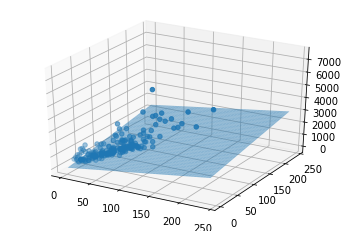

In [148]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

res = thetas[0] + thetas[1] * new_X + thetas[2] * new_Y
fig = pyplot.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(new_X, new_Y, res, alpha=0.5)
ax.scatter(X[:,1],X[:,2],y)
pyplot.show()

In [135]:
m_x1 = np.mean(X[:,1])
m_x2 = np.mean(X[:,2])

var_x1 = np.std(X[:,1])
var_x2 = np.std(X[:,2])

X_norm = np.copy(X)
X_norm[:,1] = (X[:,1]- m_x1)/ var_x1
X_norm[:,2] = (X[:,2]- m_x2)/ var_x2

In [146]:
thetas = gradientDescent(X_norm,y,0.001,1000)
print('theta 0 : ',thetas[0])
print('theta 1 : ',thetas[1])
print('theta 2 : ',thetas[2])

theta 0 :  12.797740886802426
theta 1 :  6.501494100718183
theta 2 :  5.87832728172983


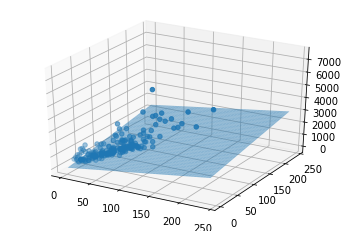

In [149]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

res = thetas[0] + thetas[1] * new_X + thetas[2] * new_Y
fig = pyplot.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(new_X, new_Y, res, alpha=0.5)
ax.scatter(X[:,1],X[:,2],y)
pyplot.show()

c) Oui ca aide la convergence, on arrive plus vite vers des thetas ou le plan se rapproche des points